In [1]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Embedding, Dense, Activation, MaxPool1D, Conv1D, LSTM
from tensorflow.keras.optimizers import Adam, SGD
import tensorflow as tf
import numpy as np

# Test data for testing the model

In [ ]:
!unzip /content/gdrive/MyDrive/Kaggle/twitterSentiment.zip

Archive:  /content/gdrive/MyDrive/Kaggle/twitterSentiment.zip
  inflating: twitterSentiment.csv    
  inflating: __MACOSX/._twitterSentiment.csv  


In [16]:
# utilities
import re
import pickle
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
from nltk.stem import WordNetLemmatizer

# sklear
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classifiimport pandas as pd 

# Importing the dataset
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv('/content/twitterSentiment.csv',
                      encoding=DATASET_ENCODING , names=DATASET_COLUMNS)

# Removing the unnecessary columns.
dataset = dataset[['sentiment','text']]
# Replacing the values to ease understanding.
dataset['sentiment'] = dataset['sentiment'].replace(4,1)

# Plotting the distribution for dataset.
ax = dataset.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists.
text, sentiment = list(dataset['text']), list(dataset['sentiment'])cation_report
import pandas as pd 

# Importing the dataset
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv('/content/twitterSentiment.csv',
                      encoding=DATASET_ENCODING , names=DATASET_COLUMNS)

# Removing the unnecessary columns.
dataset = dataset[['sentiment','text']]
# Replacing the values to ease understanding.
dataset['sentiment'] = dataset['sentiment'].replace(4,1)

# Plotting the distribution for dataset.
ax = dataset.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists.
text, sentiment = list(dataset['text']), list(dataset['sentiment'])

print(text[0])

SyntaxError: ignored

In [ ]:
import nltk
nltk.download('omw-1.4')
  
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

## Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

import time
t = time.time()
processedtext = preprocess(text)

print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment,
                                                    test_size = 0.3, random_state = 0)
print(f'Data Split done.')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Text Preprocessing complete.
Time Taken: 134 seconds
Data Split done.


In [ ]:
print(X_test[1])

it seems we are stuck on the ground in amarillo they have put ground stop for all flight leaving for denver said update in an hour 


In [2]:
!unzip /content/drive/MyDrive/Kaggle/IMDBDataset.zip

Archive:  /content/drive/MyDrive/Kaggle/IMDBDataset.zip
  inflating: IMDB Dataset.csv        
  inflating: __MACOSX/._IMDB Dataset.csv  


In [3]:
import pandas as pd

dataset = "/content/IMDB Dataset.csv"

df=pd.read_csv(dataset)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
from bs4 import BeautifulSoup
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
     

import re
def remove_between_square_brackets(text):
    return re.sub('', '', text)
     
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
     
df['review']=df['review'].apply(denoise_text)
     
df.head(20)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [5]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
     
def Convert_to_bin(text, remove_digits=True):
    if text=='positive':
      text= 1
    else:
      text=0
    return text
     

df['review']=df['review'].apply(remove_special_characters)
     

df['sentiment']=df['sentiment'].apply(Convert_to_bin)
     

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test= train_test_split(df['review'],df['sentiment'], test_size=0.3)


In [7]:
print(x_train[0])

NameError: ignored

# Data Pipeline




In [4]:
!unzip /content/drive/MyDrive/Kaggle/covid2020dataset.zip

Archive:  /content/drive/MyDrive/Kaggle/covid2020dataset.zip
   creating: covid2020dataset/
  inflating: __MACOSX/._covid2020dataset  
  inflating: covid2020dataset/Covid-19 Twitter Dataset (Apr-Jun 2020).numbers  
  inflating: __MACOSX/covid2020dataset/._Covid-19 Twitter Dataset (Apr-Jun 2020).numbers  
  inflating: covid2020dataset/Covid-19 Twitter Dataset (Aug-Sep 2020).csv  
  inflating: __MACOSX/covid2020dataset/._Covid-19 Twitter Dataset (Aug-Sep 2020).csv  
  inflating: covid2020dataset/Covid-19 Twitter Dataset (Apr-Jun 2020).csv  
  inflating: __MACOSX/covid2020dataset/._Covid-19 Twitter Dataset (Apr-Jun 2020).csv  


In [ ]:
import csv
     

def sortMentions(file_path, column_name, mentions, sentiment_list):
    with open(file_path, 'r') as file:
        # Use the csv.DictReader to read the file
        reader = csv.DictReader(file)
        # Extract the specified column and print its values
        for row in reader:
            for i in mentions:
                if((row[column_name]) == i):
                    sentiment_list.append([row['clean_tweet'], row['sentiment']])

def duplicateCleanUp(file_path, cleaned_list, sentiment_list):
      seen = set()
      for item in sentiment_list:
        t = tuple(item)
        if t not in seen:
          cleaned_list.append(item)
          seen.add(t)
          
      #for i in sentiment_list:
        #sentiment_list.count(i)
      


file_path = '/content/covid2020dataset/Covid-19 Twitter Dataset (Aug-Sep 2020).csv'
column_name = 'user_mentions'
#LISTS OF MENTIONS
left_mentions = ["HillaryClinton", "JoeBiden", "CNN", "SenKamalaHarris", "SenWarren", "SenGillibrand", "CoryBooker", "AlterNet", "AOC", "andrewcuomo", "FLOTUS", "donlemon", "MSNBC", "SpeakerPelosi", "jaketapper", "CuomoPrimeTime"]
right_mentions = ["realDonladTrump", "TuckerCarlson", "FoxNews", "Mike_Pence", "SenTedCruz", "nypost", "theblaze", "RedState", "WalshFreedom", "benshapiro", "realDailyWire", "DonaldJTrumpJr", "GregAbbott_TX", "MailOnline", "WashTimes", "HawleyMO", "amconmag", "drudgereport", "megynkelly", "OANN", "TomiLahren", "Liz_Wheeler", "RealCandaceO", "RudyGiuliani", "BuckSexton", "IvankaTrump", "dbongino", "DennisPrager", "IngrahamAngle", "SarahHuckabee", "TheBabylonBee"]
#SORTED LISTS
cleaned_left = []
cleaned_right = []
#SENTIMENT LISTS
left_sentiment_list = []
right_sentiment_list = []

#left sided
sortMentions(file_path, column_name, left_mentions, left_sentiment_list)
#right sided
sortMentions(file_path, column_name, right_mentions, right_sentiment_list)
#sorted left sided
duplicateCleanUp(file_path, cleaned_left, left_sentiment_list)
#sorted right sided
duplicateCleanUp(file_path, cleaned_right, right_sentiment_list)

#text_left, sentiment_left = map(list, zip(*cleaned_left))

"""
temp = []
def Convert_to_bin(sentiment):
    for i in sentiment:
      if i == 'pos':
        temp.append(1)
      elif i == 'neg':
        temp.append(-1)
      else:
        temp.append(0)
     
Convert_to_bin(sentiment_left)
sentiment_left = temp

X_train = text_left[150:]
X_test = text_left[:150]
Y_train = sentiment_left[150:]
Y_test = sentiment_left[:150]
"""

"\ntemp = []\ndef Convert_to_bin(sentiment):\n    for i in sentiment:\n      if i == 'pos':\n        temp.append(1)\n      elif i == 'neg':\n        temp.append(-1)\n      else:\n        temp.append(0)\n     \nConvert_to_bin(sentiment_left)\nsentiment_left = temp\n\nX_train = text_left[150:]\nX_test = text_left[:150]\nY_train = sentiment_left[150:]\nY_test = sentiment_left[:150]\n"

In [ ]:
import csv 
header = ['text', 'sentiment']

with open('covid2020.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write the data
    for row in cleaned_left:
      writer.writerow(row)

import pandas as pd

dataset = "/content/covid2020.csv"

df=pd.read_csv(dataset)
df=df.astype(str)

df.head()

from bs4 import BeautifulSoup
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
     

def Convert_to_bin(text, remove_digits=True):
    if text=='positive':
      text= 1
    else:
      text=0
    return text
     
     

df['sentiment']=df['sentiment'].apply(Convert_to_bin)

from sklearn.model_selection import train_test_split





In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(df['text'],df['sentiment'], test_size=0.1)


In [ ]:
X_train2, X_test2, Y_train2, Y_test2= train_test_split(df['text'],df['sentiment'], test_size=0.1)
frames1 = [X_train, X_train2]
frames2 = [X_test, X_test2]
frames3 = [Y_train, Y_train2]
frames4 = [Y_test, Y_test2]

X_train = pd.concat(frames1)
X_test = pd.concat(frames2)
Y_train = pd.concat(frames3)
Y_test = pd.concat(frames4)

print(Y_train.shape)

(918,)


In [ ]:
Y_test

338    brazil suffer record daili coronaviru death th...
189    need doctor reason relat covid19 telemedicin m...
351    treatment effect anyon get icu soon covid19 te...
12     studi surfac kind light type treatment differ ...
462    cow scientist genet engin anim give immun syst...
                             ...                        
515    still asleep wheel case rise drastic peopl los...
201    nichola gismondi hospit found older brother ra...
45     california assemblywoman brought newborn daugh...
395    presid trump disassoci realiti would funni dea...
153    actual old crow joe death r directli tie covid...
Name: text, Length: 102, dtype: object

In [ ]:
X_test

112    bill author feder govt manufactur contract man...
161    man austin texa arrest charg shove park ranger...
170    question rep ratcliff confirm hear today next ...
401    need covid19 test treatment vaccin abl distrib...
95     maldivian aub india bjp gov make b covid19 pan...
66     time give away money small group wealthi ameri...
139    latest nbc news confirm covid19 case u report ...
147    said hurrican maria say need accur death count...
377    thought overthrow plan would occur coup would ...
217    make mistak covid19 caus massiv econom challen...
166    upward american die everi day covid19 number c...
359    want share test posit covid19 viru seriou take...
209    new studi find evid drug hydroxychloroquin hel...
32     contact trace tool public health fieldwork id ...
183    sit donald trump republican use covid19 excus ...
432    third american survey cdc use kind riski clean...
341    fail protect american covid19 presid trump ins...
385    u soon reach death covid

# Covid19 Sentiment Anlysis Model 
Try CNN model first than switch to RNN model

First model will be using the count vectorizer method 


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
vec.fit(Y_train)
x_train=vec.transform(Y_train)
x_test=vec.transform(Y_test)

print(x_train.shape[1])

176608


In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                2825744   
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,826,033
Trainable params: 2,826,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train

<35000x176608 sparse matrix of type '<class 'numpy.int64'>'
	with 4756998 stored elements in Compressed Sparse Row format>

In [ ]:
# x_train = x_train.toarray() 
history = model.fit(x_train, Y_train,epochs=100,verbose=True,batch_size=16)

Epoch 1/100


InvalidArgumentError: ignored

TF-IDF model

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
vec.fit(X_train)
x_train=vec.transform(X_train)
x_test=vec.transform(X_test)

from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)
clf.fit(x_train,Y_train)
y_test_pred=clf.predict(x_test)

from sklearn.metrics import classification_report
report=classification_report(Y_test, y_test_pred,output_dict=True)


ValueError: ignored

In [ ]:
report

{'0': {'precision': 0.9058186738836265,
  'recall': 0.8890954974100146,
  'f1-score': 0.8973791809102487,
  'support': 7529},
 '1': {'precision': 0.8902759526938239,
  'recall': 0.9068397804845402,
  'f1-score': 0.8984815330548371,
  'support': 7471},
 'accuracy': 0.8979333333333334,
 'macro avg': {'precision': 0.8980473132887252,
  'recall': 0.8979676389472774,
  'f1-score': 0.897930356982543,
  'support': 15000},
 'weighted avg': {'precision': 0.8980773625496922,
  'recall': 0.8979333333333334,
  'f1-score': 0.8979282257683967,
  'support': 15000}}

# RNN Model

In [8]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X_train)

x_train = tokenizer.texts_to_sequences(X_train)
x_test = tokenizer.texts_to_sequences(X_test)

vocab = len(tokenizer.word_index) + 1 # num of unique words 

from keras_preprocessing.sequence import pad_sequences
maxlen = 150
x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)

In [9]:
emb_dim=50
vocab=len(tokenizer.word_index)+1
emb_mat= np.zeros((vocab,emb_dim))

file_path="/content/drive/MyDrive/Kaggle/glove.6B.50d.txt"

with open(file_path) as f:
        for line in f:
            word, *emb = line.split()
            if word in tokenizer.word_index:
              ind=tokenizer.word_index[word]
              emb_mat[ind]=np.array(emb,dtype="float32")[:emb_dim]

In [10]:
x_train

array([[ 36,  46,  33, ...,  24,  45, 245],
       [ 10, 397,   5, ...,   0,   0,   0],
       [224,  45,  48, ...,  20, 702,  62],
       ...,
       [  2,  27, 127, ..., 200, 104, 107],
       [  9, 619,   3, ...,   0,   0,   0],
       [233,  15,   8, ...,   0,   0,   0]], dtype=int32)

In [11]:
Y_train

42026    1
14091    0
31472    0
11949    0
35847    0
        ..
37917    0
11368    0
16269    1
5237     1
29879    1
Name: sentiment, Length: 35000, dtype: int64

In [12]:
emb_dim = 150 # match maxlen?
model = Sequential([
    Embedding(input_dim = vocab, output_dim=emb_dim, input_length=maxlen),
    Conv1D(64, 5, activation='relu'),
    MaxPool1D((5)), 
    Conv1D(128, 5, activation='relu'),
    MaxPool1D((5)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 150)          26605500  
                                                                 
 conv1d (Conv1D)             (None, 146, 64)           48064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 29, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 25, 128)           41088     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 5, 128)           0         
 1D)                                                             
                                                                 
 dense (Dense)               (None, 5, 64)             8

In [14]:
train_score = model.evaluate(x_train, Y_train)
train_score

1094/1094 [==============================] - 23s 20ms/step - loss: 0.6930 - accuracy: 0.5079


[0.6930055022239685, 0.5079368948936462]

In [ ]:
test_score = model.evaluate(x_test, Y_test)
test_score

469/469 [==============================] - 2s 4ms/step - loss: 0.6932 - accuracy: 0.5001


[0.6931668519973755, 0.5001081824302673]

In [15]:
history = model.fit(x_train, Y_train, epochs = 10, batch_size = 32)

Epoch 1/10
  43/1094 [>.............................] - ETA: 6:44 - loss: 0.6931 - accuracy: 0.5161

KeyboardInterrupt: ignored

In [298]:
model.predict(x_test[:1]).flatten()

1/1 [==============================] - 0s 26ms/step


array([0.18445596, 0.37745154, 0.5529583 , 0.05679338, 0.5933913 ],
      dtype=float32)

In [ ]:
model.save("model.h5", history)

# Vader Sentiment Model Analysis

In [6]:
import csv  

def sortMentions(file_path, column_name, mentions, sentiment_list):
    with open(file_path, 'r') as file:
        # Use the csv.DictReader to read the file
        reader = csv.DictReader(file)
        # Extract the specified column and print its values
        for row in reader:
            for i in mentions:
                if((row[column_name]) == i):
                    sentiment_list.append([row['clean_tweet'], row['sentiment']])

def duplicateCleanUp(file_path, cleaned_list, sentiment_list):
      seen = set()
      for item in sentiment_list:
        t = tuple(item)
        if t not in seen:
          cleaned_list.append(item)
          seen.add(t)
          
      #for i in sentiment_list:
        #sentiment_list.count(i)
      


file_path = '/content/covid2020dataset/Covid-19 Twitter Dataset (Apr-Jun 2020).csv'
column_name = 'user_mentions'
#LISTS OF MENTIONS
left_mentions = ["HillaryClinton", "JoeBiden", "CNN", "SenKamalaHarris", "SenWarren", "SenGillibrand", "CoryBooker", "AlterNet", "AOC", "andrewcuomo", "FLOTUS", "donlemon", "MSNBC", "SpeakerPelosi", "jaketapper", "CuomoPrimeTime"]
right_mentions = ["realDonladTrump", "TuckerCarlson", "FoxNews", "Mike_Pence", "SenTedCruz", "nypost", "theblaze", "RedState", "WalshFreedom", "benshapiro", "realDailyWire", "DonaldJTrumpJr", "GregAbbott_TX", "MailOnline", "WashTimes", "HawleyMO", "amconmag", "drudgereport", "megynkelly", "OANN", "TomiLahren", "Liz_Wheeler", "RealCandaceO", "RudyGiuliani", "BuckSexton", "IvankaTrump", "dbongino", "DennisPrager", "IngrahamAngle", "SarahHuckabee", "TheBabylonBee"]
#SORTED LISTS
cleaned_left1 = []
cleaned_right1 = []
#SENTIMENT LISTS
left_sentiment_list1 = []
right_sentiment_list1 = []

#SORTED LISTS
cleaned_left2 = []
cleaned_right2 = []
#SENTIMENT LISTS
left_sentiment_list2 = []
right_sentiment_list2 = []


#left sided
sortMentions(file_path, column_name, left_mentions, left_sentiment_list1)
#right sided
sortMentions(file_path, column_name, right_mentions, right_sentiment_list1)

#sorter left sided
duplicateCleanUp(file_path, cleaned_left1, left_sentiment_list1)
#sorted right sided
duplicateCleanUp(file_path, cleaned_right1, right_sentiment_list1)

text_left1, sentiment_left1 = map(list, zip(*cleaned_left1))
text_right1, sentiment_right1 = map(list, zip(*cleaned_right1))

file_path = '/content/covid2020dataset/Covid-19 Twitter Dataset (Aug-Sep 2020).csv'

#left sided
sortMentions(file_path, column_name, left_mentions, left_sentiment_list2)
#right sided
sortMentions(file_path, column_name, right_mentions, right_sentiment_list2)
#sorter left sided
duplicateCleanUp(file_path, cleaned_left2, left_sentiment_list2)
#sorted right sided
duplicateCleanUp(file_path, cleaned_right2, right_sentiment_list2)

text_left2, sentiment_left2 = map(list, zip(*cleaned_left2))
text_right2, sentiment_right2 = map(list, zip(*cleaned_right2))

text_left = text_left1 + text_left2
text_right = text_right1 + text_right2

sentiment_left = sentiment_left1 + sentiment_left2
sentiment_right = sentiment_right1 + sentiment_right2

# temp = []
# def Convert_to_bin(sentiment):
#     for i in sentiment:
#       print(i)
#       if i == 'pos':
#         temp.append(1)
#       elif i == 'neg':
#         temp.append(-1)
#       else:
#         temp.append(0)
     
# Convert_to_bin(sentiment)
# sentiment = temp

# #left
# from sklearn.model_selection import train_test_split

# X_train, X_test, Y_train, Y_test= train_test_split(text,sentiment, test_size=0.3)

#X_train1, X_test1, Y_train1, Y_test1= train_test_split(cleaned_left, left_sentiment_list, test_size=0.2)
# X_train2, X_test2, Y_train2, Y_test2= train_test_split(cleaned_left2, left_sentiment_list2, test_size=0.2)

#right
# X_train1, X_test1, Y_train1, Y_test1= train_test_split(cleaned_right1, left_sentiment_right1, test_size=0.2)
# X_train2, X_test2, Y_train2, Y_test2= train_test_split(cleaned_right2, left_sentiment_right2, test_size=0.2)



# Scrapper 

In [18]:
!pip install -q snscrape


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 KB 3.0 MB/s eta 0:00:00


In [20]:
#importing libraries
import os
import pandas as pd
from datetime import date
import re
import numpy as np


#declare the list
tweet_database = []
tweet_database1D = []
tweet_database_final_clean = []


#set end date use date.today() for present
today = '2016-06-06'
end_date = today

#keyword
search_term = 'election'
#beginning date
from_date = '2015-01-01'

max_results = 5000


extracted_tweets = "snscrape --format '{content!r}'"+ f" --max-results {max_results} --since {from_date} twitter-search '{search_term} until:{end_date}' > extracted-tweets.txt"
#tweet extractor
os.system(extracted_tweets)
#determines if no tweets were found
if os.stat("extracted-tweets.txt").st_size == 0:
  print('No Tweets found')
#finds tweets with listed keyword content
else:
  df = pd.read_csv('extracted-tweets.txt', names=['content'])
  for row in df['content'].iteritems():
    tweet_database.append(row)

#sets username
user_name = "USERNAME"
user_tweets = "snscrape --format '{content!r}'"+ f" --max-results {max_results} --since {from_date} twitter-user '{user_name} until:{end_date}' > user-tweets.txt"

os.system(user_tweets)
#determines if no tweets were found
if os.stat("user-tweets.txt").st_size == 0:
  print('No Tweets found')
#finds tweets from that user within givin set date
else:
  df = pd.read_csv('user-tweets.txt', names=['content'])
  for row in df['content'].iteritems():
    tweet_database.append(row)
     
tweet_database1D = np.array(tweet_database).T.tolist()

temp = []
for tweet in tweet_database1D[0]:
  temp.append(tweet)

tweet_database1D = temp

#REMOVING URL Function
def remove_urls (v_text):
    v_text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', v_text, flags=re.MULTILINE)
    return(v_text)

#Duplicate remover changes tweet_database to cleaned_list
cleaned_list = list(set(tweet_database1D))

No Tweets found


In [24]:
print(tweet_database1D)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '15

In [2]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 3.9 MB/s eta 0:00:00


In [25]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment_model = SentimentIntensityAnalyzer()
sentiment_dict = sentiment_model.polarity_scores("My Condolences to the Family of those who did not survive #Covid_19!")
     
print("Overall sentiment dictionary is : ", sentiment_dict)
print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")

Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive


In [29]:
text = text_right 
def show_data(text):
  total_neg = 0
  neg_count = 0
  total_pos = 0
  pos_count = 0
  total_neu = 0
  total_count = 0

  for tweet in text:
    total_count += 1
    sentiment_dict = sentiment_model.polarity_scores(tweet)
    sentiment_val = max(sentiment_dict['neg'], sentiment_dict['neu'],sentiment_dict['pos']) # gets the highest percentage 
    if(sentiment_dict['neg'] == sentiment_val):
      total_neg+=1
      neg_count+=1
    elif sentiment_dict['pos'] == sentiment_val:
      total_pos+=1
      pos_count+=1
    else:
      total_neu+=1
    
  avg_neg = total_neg/total_count
  avg_pos = total_pos/total_count
  avg_neu = total_neu/total_count
  print("Average Negative: ", avg_neg)
  print("Average Positive: ", avg_pos)
  print("Avergae Neutral: ", avg_neu)

print("Right leaning politics")
show_data(text)
text = text_left

print("Left learning politics")
show_data(text)

Right leaning politics
Average Negative:  0.05622489959839357
Average Positive:  0.01606425702811245
Avergae Neutral:  0.927710843373494
Left learning politics
Average Negative:  0.03333333333333333
Average Positive:  0.011764705882352941
Avergae Neutral:  0.9549019607843138


# Entire Covid Dataset

['trump said last month anyon want test covid19 get one true still nearli', 'pos']


In [ ]:
frames1 = [X_train1, X_train2]
frames2 = [X_test1, X_test2]
frames3 = [Y_train1, Y_train2]
frames4 = [Y_test1, Y_test2]

X_train = pd.concat(frames1)
X_test = pd.concat(frames2)
Y_train = pd.concat(frames3)
Y_test = pd.concat(frames4)

Encoding

In [6]:
!pip3 install tensorflow_text>=2.0.0rc0

In [3]:
import tensorflow_hub as hub

use = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")

In [ ]:
#Each sentence passed to the model is encoded as a vector with 512 elements

In [33]:
import csv 
header = ['text', 'sentiment']

with open('covid2020.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write the data
    for row in cleaned_left:
      writer.writerow(row)

import pandas as pd

dataset = "/content/covid2020.csv"

df=pd.read_csv(dataset)
df=df.astype(str)

df.head()

,text,sentiment
0,trump said last month anyon want test covid19 ...,pos
1,trump use elector map make life death decis di...,neg
2,eert say need greatli eand covid19 test capac ...,pos
3,peopl around globe point led govern effort inv...,pos
4,limit le impact posit nation institut health b...,neu


TypeError: ignored

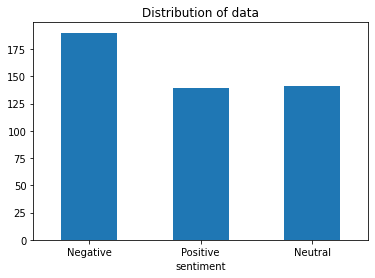

In [35]:
import pandas as pd 

# Plotting the distribution for dataset.
ax = df.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive','Neutral'], rotation=0)

# Storing data in lists.
text, sentiment = list(dataset['text']), list(dataset['sentiment'])

In [54]:
Y_train

[-1,
 1,
 1,
 -1,
 0,
 1,
 -1,
 0,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 0,
 1,
 1,
 -1,
 0,
 0,
 0,
 1,
 0,
 0,
 -1,
 -1,
 1,
 1,
 1,
 0,
 -1,
 -1,
 -1,
 0,
 1,
 0,
 0,
 1,
 -1,
 -1,
 0,
 0,
 -1,
 0,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 0,
 1,
 0,
 -1,
 1,
 -1,
 -1,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 0,
 0,
 -1,
 1,
 0,
 0,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 0,
 -1,
 -1,
 1,
 0,
 -1,
 -1,
 0,
 -1,
 0,
 -1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 -1,
 1,
 -1,
 0,
 0,
 0,
 1,
 0,
 -1,
 1,
 1,
 0,
 0,
 0,
 1,
 -1,
 1,
 -1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 -1,
 1,
 0,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 0,
 1,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 -1,
 0,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 0,
 -1,
 -1,
 0,
 1,
 1,
 0,
 -1,
 0,
 1,
 1,
 0,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 0,
 -1,
 0,
 -1,
 -1,
 0,
 1,
 -1,
 0,
 0,
 0,
 0,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 0,
 0,
 1,
 -1,
 1,
 0,
 0,
 -1,
 -1,
 -1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 0,
 0,
 0,
 0,
 1,
 -1,
 1,
 0,
 0,
 -1,
 0,


In [39]:
X_train

['trump said last month anyon want test covid19 get one true still nearli']

In [52]:
from sklearn.preprocessing import OneHotEncoder

type_one_hot = OneHotEncoder(sparse=False).fit_transform(
  Y_train.reshape(-1, 1))


array(['hey joe scienc wrong tweeti',
       'tri understand disinfect stori happen wh brief thursday bill bryan',
       'hertz file bankruptci latest victim econom downturn amid covid19 compani rent car sinc',
       'scale econom devast caus covid19 stagger hous democrat pass ppp flexibl act pr',
       'coronaviru pandem broad power governor exercis emerg declar underscor limit',
       'join senat kamala harri symon sander town hall address impact dispar covid19 black',
       'nose swab finger prick differ test give u differ insight covid19 latest podcast coronaviru fact v',
       'make mistak covid19 caus massiv econom challeng crisi hit u harder last longer becau',
       'someon pleas ask dt would use disinfect suggest famili member use prevent cure covid19',
       'covid19 affect anyon anywher impact everi commun equal watch dr eboni jade hilton elain',
       'let link everyth covid19',
       'worker face safeti violat work retali whistleblow may hard time file claim covi

In [55]:
X_train = np.array(X_train)
Y_train = np.array(X_test)


import keras
model = keras.Sequential()

model.add(
  keras.layers.Dense(
    units=256,
    input_shape=(X_train.shape[1], ),
    activation='relu'
  )
)
model.add(
  keras.layers.Dropout(rate=0.5)
)

model.add(
  keras.layers.Dense(
    units=128,
    activation='relu'
  )
)
model.add(
  keras.layers.Dropout(rate=0.5)
)

model.add(keras.layers.Dense(2, activation='softmax'))
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

IndexError: ignored

# To Do
- Decide on what model to use 
- Most likely use the entire covid dataset
- Use the model that achieved 89

- Train on an older dataset and compare the averaged scores of negativity and positivity between 2020 and another 

- Finish flask 
- Display the graph
- Display the 

-----------------
- We have a general model for sentiment analysis
- Train this model with covid dataset (left and right) and calcualte the average positive and negative for each side
- Do this again with an older dataset and compare 